In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

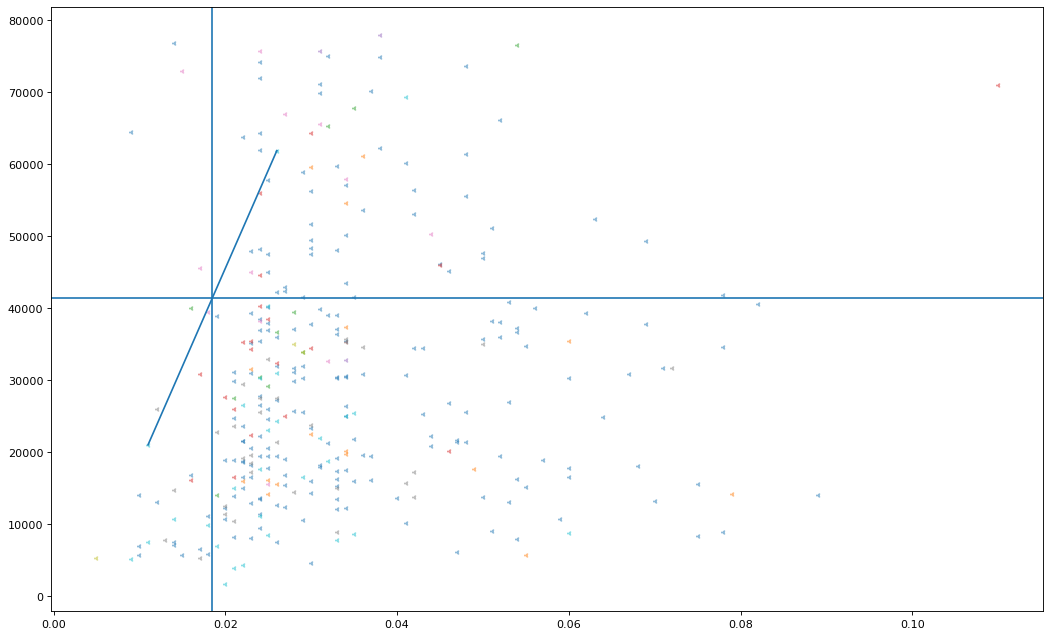

In [12]:
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")
categories = np.unique(midwest['category'])      # 使用np.unique对“midwest['category']” 去重
colors = [plt.cm.tab10(i/float(len(categories) - 1)) for i in range(len(categories))]  # 使用列表推导式，建立colors列表。
#
plt.figure(figsize = (16, 10),     # 绘图尺寸，默认为（6.4,4.8）
            dpi = 80,              # 图像的分辨率，默认dpi为100
            facecolor = 'w',       # 背景颜色，默认为白色
            edgecolor = 'k' )   
for i, category in enumerate(categories):
    data = midwest.loc[midwest.category == category,:]
    area = data['area']
    poptotal = data['poptotal']
    plt.scatter("area", "poptotal",                                 # 横坐标名称，纵坐标名称
                data = midwest.loc[midwest.category == category,:], # 程序会自动的从data提取data中"area"和"poptotal"数据
                s = 20,                                             # 数据点尺寸
                c = np.array(colors[i]).reshape(1, -1),             # 设定颜色，若不转换为二维，会出现报错
                label = str(category),marker='3',alpha=0.5)                              # 设定标签名称透明度
area_mean = area.mean() 
poptotal_mean = poptotal.mean()
plt.axvline(area_mean)
plt.axhline(poptotal_mean)



from sklearn.linear_model import LinearRegression
area.values.reshape(area.shape[0],1)#area.values[:,None],np.newaxis
Aera = midwest['area']
Poptotal = midwest['poptotal']
model = LinearRegression()

model.fit(area.values.reshape(area.shape[0],1),poptotal)
predict = model.predict(area.values.reshape(area.shape[0],1))
plt.legend()
plt.plot(area,predict)